---
title: "Plotting guidelines"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## increase fontsize to legible sizes

In [110]:
#| code-summary: "import stuff"
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib
import numpy as np
import pandas as pd

Graph with default matplotlib values:

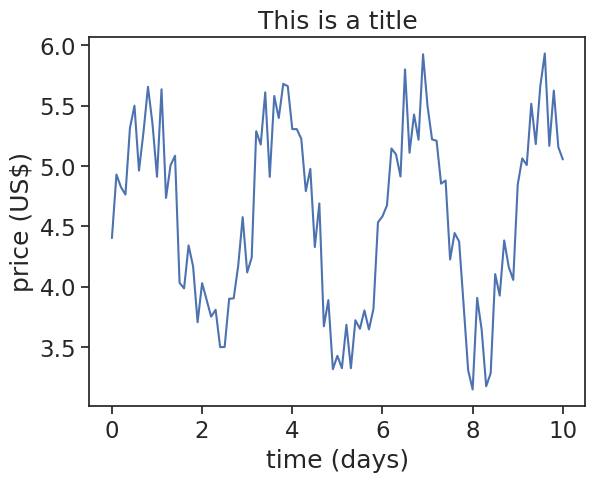

In [111]:
#| code-summary: "plot with default matplotlib values"
t = np.linspace(0, 10, 101)
y = np.sin(2.0*np.pi*t/3) + np.random.random(len(t)) + 4.0
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set(title="This is a title",
       xlabel="time (days)",
       ylabel="price (US$)"
      );

You can use `seaborn` to easily change plot style and font size:

In [112]:
#| code-fold: false
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)

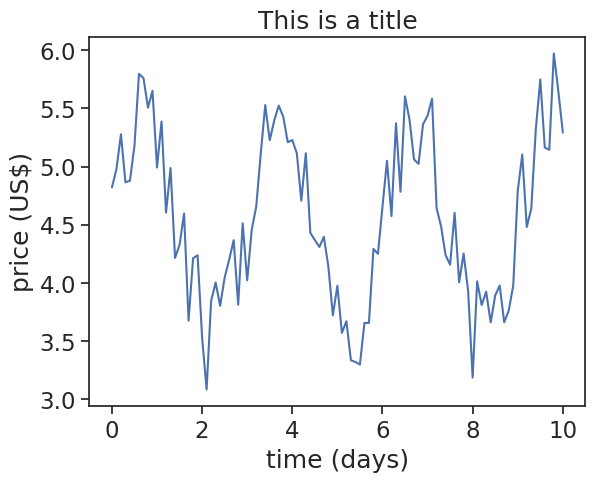

In [113]:
#| code-summary: "plot after seaborn theme changes"
t = np.linspace(0, 10, 101)
y = np.sin(2.0*np.pi*t/3) + np.random.random(len(t)) + 4.0
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set(title="This is a title",
       xlabel="time (days)",
       ylabel="price (US$)"
      );

I recommend that you read seaborn's [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html){target="_blank"}.

## choose colors wisely

In [114]:
#| code-summary: "define useful functions"
import math
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

When you plot with matplotlib, the default color order is the following. You can always specify a plot's color by typing something like `color="tab:red`.

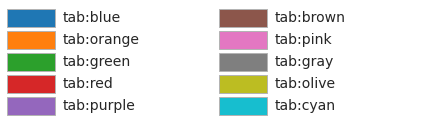

In [115]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False);

You can write other words as color names, see below.

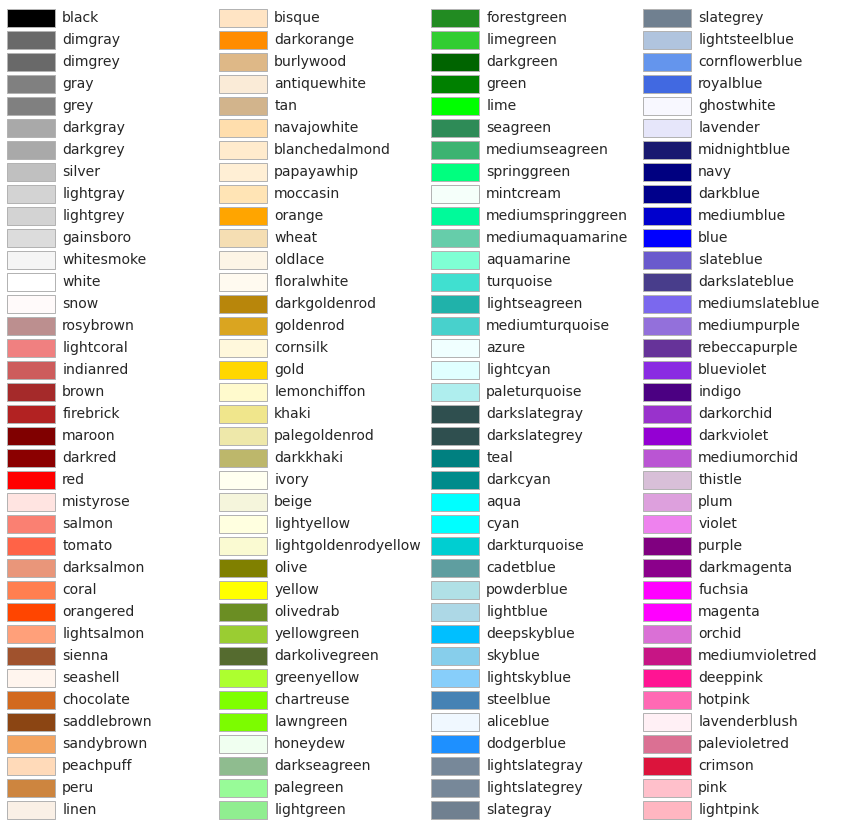

In [116]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

This reminds me of this cartoon:

![](doghouse_color_wheel_altered.jpg)

For almost all purposes, all these colors should be more than enough.

**Be consistent!**: if in one plot precipitation is blue and temperature is red, make sure you keep the same colors throughout your assignment.

**Be mindful of blind-color people**: A good rule of thumb is to avoid red and green shades in the same graph.

I'll put a bunch of links below, this is for my own reference, but you are more than welcome to take a look.

* [ColorBrewer](https://colorbrewer2.org/)
* [Palettable](https://jiffyclub.github.io/palettable/)
* [xkcd colors](https://xkcd.com/color/rgb/)
* [Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

## the best legend is no legend

Text(-0.5, 4, 'signal C')

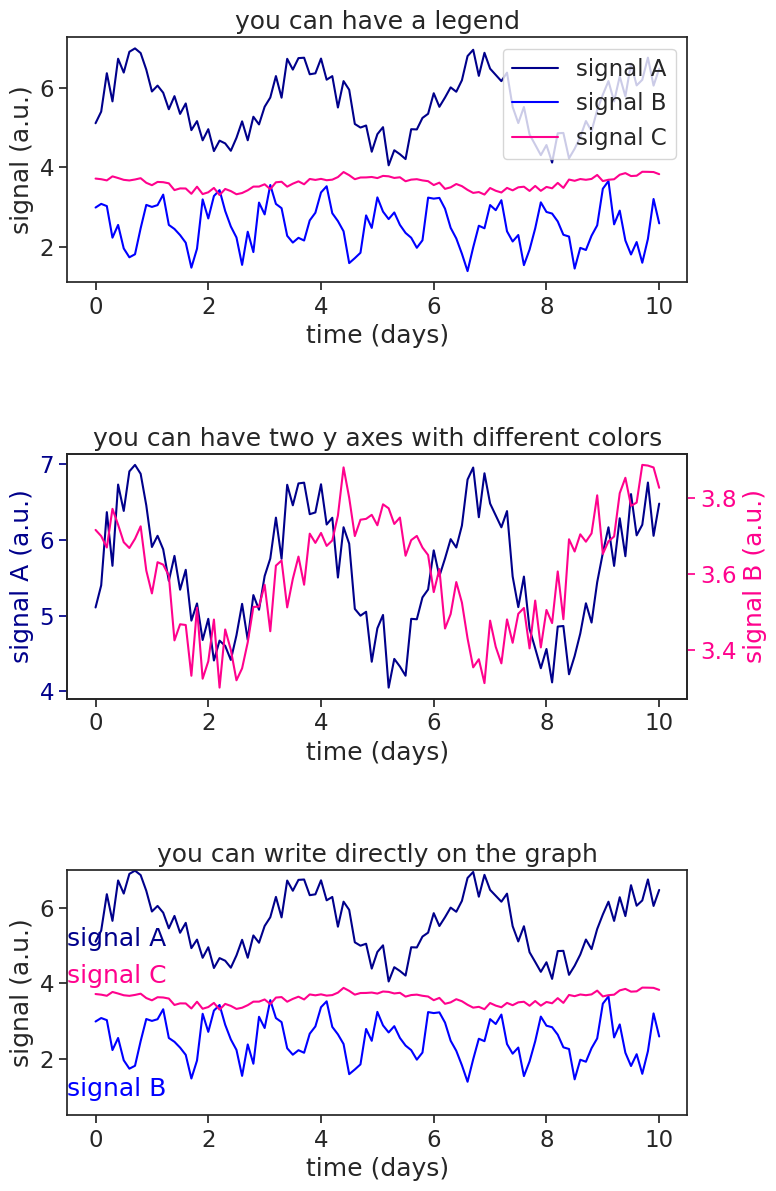

In [117]:
#| code-summary: "plot after seaborn theme changes"
t = np.linspace(0, 10, 101)
y1 = np.sin(2.0*np.pi*t/3) + np.random.random(len(t)) + 5.0
y2 = 0.7*np.sin(2.0*np.pi*t/1+1.0) + np.random.random(len(t)) + 2.0
y3 = 0.2*np.sin(2.0*np.pi*t/5+2.0) + 0.2*np.random.random(len(t)) + 3.5

fig, ax = plt.subplots(3, 1, figsize=(8,14))
fig.subplots_adjust(hspace=0.7)

# you can use legends
ax[0].plot(t, y1, color="darkblue", label="signal A")
ax[0].plot(t, y2, color="blue", label="signal B")
ax[0].plot(t, y3, color="xkcd:hot pink", label="signal C")
ax[0].set(title="you can have a legend",
          xlabel="time (days)",
          ylabel="signal (a.u.)"
         )
ax[0].legend()

# you can use an extra y axes
p1, = ax[1].plot(t, y1, color="darkblue")
ax[1].yaxis.label.set_color(p1.get_color())
ax[1].tick_params(axis='y', colors=p1.get_color())
ax[1].set(xlabel="time (days)",
          ylabel="signal A (a.u.)",
          title="you can have two y axes with different colors"
         )
ax1b = plt.twinx(ax[1])
p2, = ax1b.plot(t, y3, color="xkcd:hot pink", label="signal C")
ax1b.set(ylabel="signal B (a.u.)"
        )
ax1b.yaxis.label.set_color(p2.get_color())
ax1b.tick_params(axis='y', colors=p2.get_color())

# you can write directly on the graph
ax[2].plot(t, y1, color="darkblue", label="signal A")
ax[2].plot(t, y2, color="blue", label="signal B")
ax[2].plot(t, y3, color="xkcd:hot pink", label="signal C")
ax[2].set(xlabel="time (days)",
          ylabel="signal (a.u.)",
          ylim=[0.5,7],
          title="you can write directly on the graph"
         )
ax[2].text(-0.5, 5, "signal A", color="darkblue", ha="left")
ax[2].text(-0.5, 1, "signal B", color="blue", ha="left")
ax[2].text(-0.5, 4, "signal C", color="xkcd:hot pink", ha="left")

You can also make a colorbar to substitute a legend.

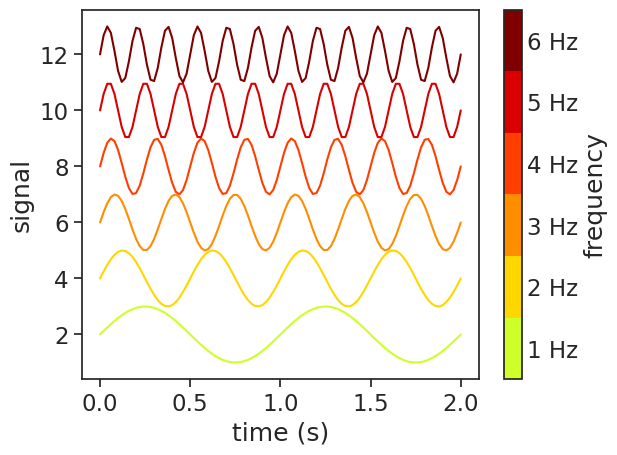

In [119]:
#| code-summary: "make a discrete colorbar"

num_lines = 6

t = np.linspace(0, 2, 101)

# Get truncated colormap
cmap = plt.colormaps.get_cmap('jet')
bottom = 0.6; top = 1.0
truncated_cmap = mcolors.LinearSegmentedColormap.from_list("truncated_viridis", cmap(np.linspace(bottom, top, num_lines)))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the lines with increasing frequency
for i in range(num_lines):
    freq = i + 1
    y = np.sin(2.0 * np.pi * t * freq) + 2*freq
    ax.plot(t, y, color=truncated_cmap(i / (num_lines - 1)), label=f'Slope {slope}')

ax.set(xlabel="time (s)",
       ylabel="signal")

# Create a discrete colorbar
boundaries = np.linspace(0.5, num_lines + 0.5, num_lines + 1)
ticks = np.arange(num_lines) + 1
norm = mcolors.BoundaryNorm(boundaries, truncated_cmap.N)
sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
sm.set_array([])  # fake up the array of the scalar mappable
cbar = plt.colorbar(sm, ticks=ticks, boundaries=boundaries, label='frequency', ax=ax)
cbar.ax.tick_params(which='both', size=0)
freq_list = [f"{x+1} Hz" for x in range(num_lines)]
cbar.set_ticklabels(freq_list)
